In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [ ]:
df = pd.read_csv('clean_encoded_df.csv')

In [ ]:
print(df)

                                                    text  label
0      dear american teens question dutch person hear...    0.0
1      nothing look forward lifei dont many reasons k...    1.0
2      music recommendations im looking expand playli...    0.0
3      im done trying feel betterthe reason im still ...    1.0
4      worried  year old girl subject domestic physic...    1.0
...                                                  ...    ...
18027  one peter sellers best movies never shown tv m...    0.0
18028  friends saved life halloweenpart wishes didnt ...    1.0
18029  god dammit said math class teacher got angry d...    0.0
18030  run away find brighter day run away find brigh...    0.0
18031  want hang like tara condells deathi really hat...    NaN

[18032 rows x 2 columns]


In [ ]:
number_of_rows = len(df)
number_of_rows

18032

In [ ]:
depressed = df[df['label']==1]
not_depressed = df[df['label']==0]
print(len(depressed))
print(len(not_depressed))

8885
9146


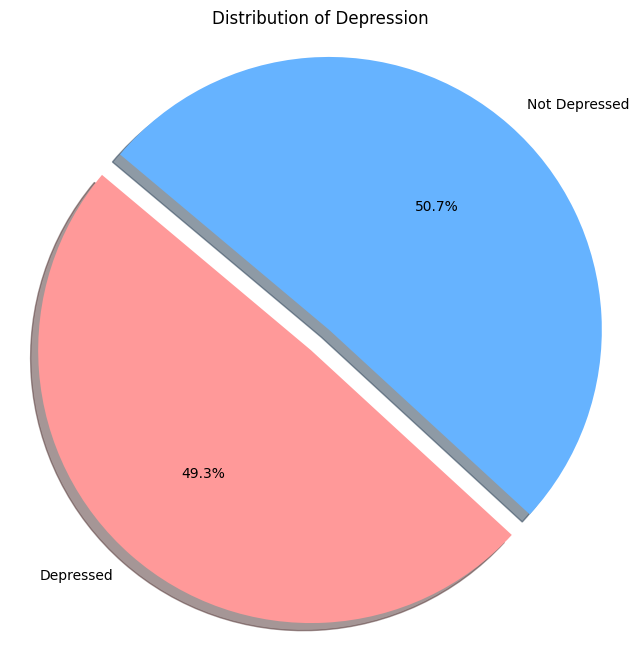

In [ ]:
labels = ['Depressed', 'Not Depressed']
sizes = [len(depressed), len(not_depressed)]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Depression')
plt.axis('equal')

plt.show()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# here we are removing the stop words
stop_words = set(stopwords.words("english"))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
df['clean_text_without_stopwords'] = df['text'].apply(remove_stopwords)
new_df = df[['clean_text_without_stopwords','label']]

In [ ]:
print(new_df.head())

                        clean_text_without_stopwords  label
0  dear american teens question dutch person hear...      0
1  nothing look forward lifei dont many reasons k...      1
2  music recommendations im looking expand playli...      0
3  im done trying feel betterthe reason im still ...      1
4  worried year old girl subject domestic physica...      1


In [ ]:
# here we are applying lematization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
new_df['clean_text'] = new_df['clean_text_without_stopwords'].apply(lemmatize_text)

In [ ]:
final_df = new_df[['clean_text','label']]

In [ ]:
# APPLYING THE BAG OF WORDS(BOW) TECHNIQUE FOR SENTIMENTAL ANALYSIS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib

In [ ]:
X = final_df['clean_text']
y = final_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 2: Vectorize the text
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
# Step 3: Train the model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Step 4: Evaluate the model



predictions = model.predict(X_test_vectorized)
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print(predictions)
print(X_test_vectorized)

[1 1 0 ... 1 1 1]
  (0, 102)	1
  (0, 8118)	1
  (0, 8443)	1
  (0, 9545)	1
  (0, 11002)	1
  (0, 11510)	1
  (0, 13258)	1
  (0, 15380)	1
  (0, 15468)	1
  (0, 16785)	1
  (0, 16812)	2
  (0, 16853)	1
  (0, 19680)	1
  (0, 21022)	2
  (0, 21119)	1
  (0, 23054)	1
  (0, 25582)	1
  (0, 25643)	2
  (0, 27424)	2
  (0, 29174)	1
  (0, 29763)	2
  (0, 30745)	1
  (0, 34051)	1
  (0, 34711)	1
  (0, 35525)	1
  :	:
  (5595, 52322)	2
  (5595, 52372)	1
  (5595, 52517)	1
  (5595, 52787)	1
  (5595, 52931)	1
  (5595, 53265)	1
  (5595, 53289)	2
  (5595, 53297)	1
  (5595, 53415)	1
  (5595, 53927)	1
  (5595, 54146)	1
  (5595, 54148)	1
  (5595, 55708)	1
  (5595, 56075)	3
  (5595, 56448)	1
  (5595, 56554)	1
  (5595, 56739)	1
  (5595, 57013)	3
  (5595, 57371)	2
  (5595, 57449)	2
  (5595, 57481)	1
  (5595, 57666)	2
  (5595, 58049)	4
  (5595, 58167)	1
  (5595, 58280)	1


In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nModel Score (Accuracy):", accuracy)

Confusion Matrix:
[[1979  823]
 [  49 2745]]

Model Score (Accuracy): 0.8441744102930665


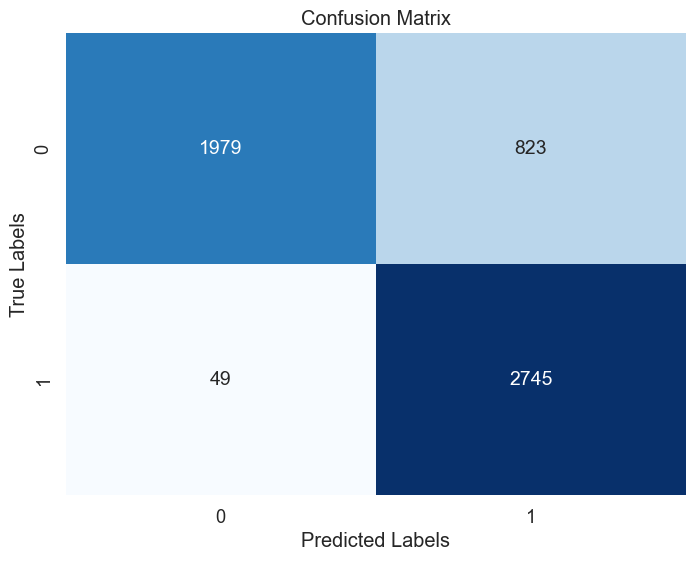

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14}, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
sentence  = "worried  year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl  years lives uk live different country kept touch electronic means first girl schizophrenic host illnesses too dad severe anger issues abuses physically mentally makes serve food wash dishes clean house shouts beats petty things like spilling water picking toys floor threatened knife beats plates glasses punches head last time got beat around month ago one siblings gets beat up tried tell mother beating showed bruises too mother refuses believe even laughed off probably fear confronting him husband yells wife too family treat well either sister mean tell father put trouble family tends isolate her even remember birthday all family cold her often tend alienate since act normal girl often feels suicidal due this inflicted selfharm cut wrist starves believes way family accept her make worse two incidents life must tell about raped walking back home night initially tell parents sometime later police reports filed rape suffered false pregnancy girl symptoms disorder like lactating breasts happened early  depressed incident summer  approximately family sent couple family friends wellknown treatments advertised herbal therapy accupuncture etc however happened next terrible left alone husband wife went somewhere else guy tortured her instance made sit container filled water upto neck closed lid imagine kind stress panic would cause schizophrenic patient miscellaneous details gt gets visit psychiatrist school able hide problems psychiatrist noted girl able put front really well gt five psychiatrists past gt enjoys drawingpainting learning new languages writing poems gt depressed tends victimized mentality blames problems want report abuse due trouble family face tells stopped cutting lately problem refuses tell anyone abuse even tries defend father saying fault help her although seem extremely suicidal concern physically mental abuse girl subject everyday healthy environment anyone grow in really wish rescued clutches belligerent controlling father dysfunctional family"

In [ ]:
final_sentence =  vectorizer.transform([sentence])
new_predection = model.predict(final_sentence);



In [ ]:
if new_predection[0] == 1:
    print("The sentence indicates the person might be depressed.")
else:
    print("The sentence does not indicate depression.")

The sentence indicates the person might be depressed.


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'trained_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']